# Desition Tree

### 예제) 이상형 고르기
외모, 성격, 건강을 조건으로 이상형을 분류하는 예제

*  dataset

외모 | 성격 | 건강| 이상형
---|---|---|---
yes | yes | yes| yes
yes | yes | no| no
no | no | yes | no
no| yes|yes | no
yes|yes|no|no
yes |no|yes| no
no|no|yes|no
no| yes| no| no

#### 결정 트리 이상형 예제(entropy)

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)

tree_ent = DecisionTreeClassifier(criterion='entropy')
tree_ent.fit(X,y)
print("Train Accurray: ", tree_ent.score(X, y))
print(tree_ent.predict(X))

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
Train Accurray:  1.0
[1 0 0 0 0 0 0 0]


#### 결정 트리 이상형 예제( Jini)

In [2]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)

tree_jini = DecisionTreeClassifier(random_state=0)
tree_jini.fit(X,y)
print("Train Accurray: ", tree_jini.score(X, y))

print(tree_jini.predict(X))

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
Train Accurray:  1.0
[1 0 0 0 0 0 0 0]


## 트리 시각화
* pydot
    * pip install pydot
* grphviz
    * 실행파일 설치 : https://graphviz.gitlab.io/download/
        * windows : https://graphviz.gitlab.io/_pages/Download/Download_windows.html
    * `pip install graphviz`

In [3]:
!pip install pydot graphviz

You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [4]:
import pydot
import graphviz
from sklearn.externals.six import StringIO  
import sys, os, os.path

os.environ['PATH'] = "c:/Program Files (x86)/Graphviz2.38/bin"

def showTree(dt, feature_names, class_names):
    dot_data = StringIO()
    export_graphviz(dt,
                    out_file=dot_data,
                    feature_names=feature_names,
                    class_names=class_names)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
    display(graphviz.Source(graph))

c:\python37\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


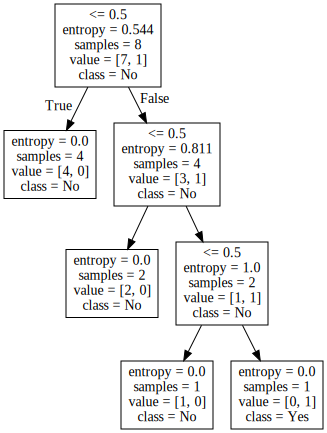

In [5]:
showTree(tree_ent, ["외모", "성격", "건강"], ["No", "Yes"])

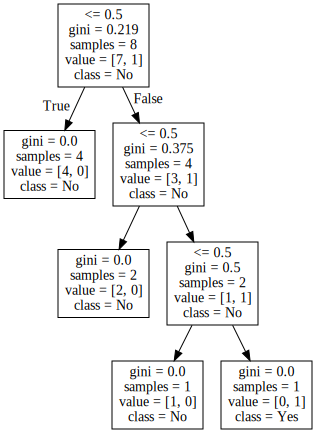

In [6]:
showTree(tree_jini, ["외모", "성격", "건강"], ["No", "Yes"])

### 유방암 예제

In [7]:
def plot_feature_importance(dataset, model):
    n = len(dataset.feature_names)
    plt.barh(range(n), model.feature_importances_, align='center')
    plt.yticks(np.arange(n), dataset.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel('features')
    plt.show()
    

Train Accuracy(depth=0): 100.000%
Test Accuracy(depth=0): 93.706%
feature importance: [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]
Train Accuracy(depth=4): 98.826%
Test Accuracy(depth=4): 95.105%
feature importance: [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


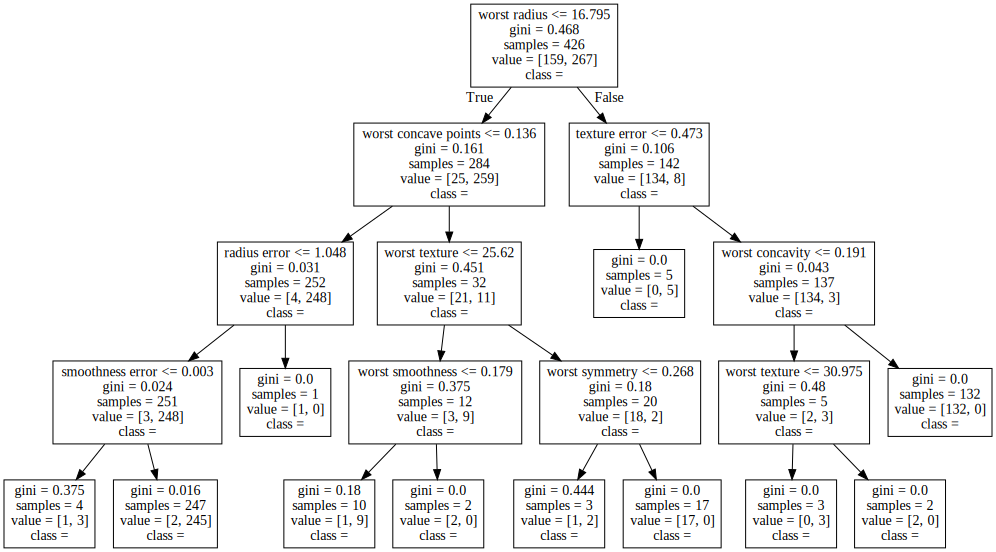

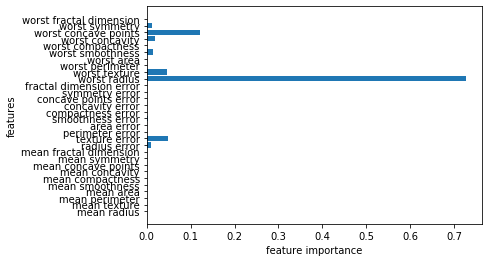

In [8]:
from sklearn import model_selection
from sklearn import datasets

def cancer_lab(depth=0):
    random_state = 0
    cancer = datasets.load_breast_cancer()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(cancer.data,
                                                        cancer.target,
                                                        stratify=cancer.target,
                                                        random_state=42
                                                        )
    
    if depth == 0:
        tree = DecisionTreeClassifier(random_state=random_state)
    else :
        tree = DecisionTreeClassifier(random_state=random_state, max_depth=4) 
    tree.fit(X_train, y_train)
    print('Train Accuracy(depth=%d): %.3f%%'%(depth, tree.score(X_train, y_train)*100))
    print('Test Accuracy(depth=%d): %.3f%%'%(depth, tree.score(X_test, y_test)*100))

    return tree, cancer

tree1, cancer = cancer_lab() 
print("feature importance:", tree1.feature_importances_)
tree2, cancer = cancer_lab(4)
print("feature importance:", tree1.feature_importances_)

showTree(tree2, cancer.feature_names, ['악성', '양성'])
plot_feature_importance(cancer, tree2)


# Ensemble(앙상블) 기법


#### Voting
* 유방암

In [11]:
from sklearn import model_selection
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = model_selection.train_test_split(cancer.data,
                                                                    cancer.target,
                                                                    random_state=0)

lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)
voting = VotingClassifier(estimators=[('LR', lr), ('KNN', knn)], voting='soft')

for cl in [voting, lr, knn] :
    cl.fit(X_train, y_train)
    pred = cl.predict(X_test)
    name = cl.__class__.__name__
    print(f'{name} Accuracy: {accuracy_score(y_test, pred)*100:.2f}%')


VotingClassifier Accuracy: 95.80%
LogisticRegression Accuracy: 94.41%
KNeighborsClassifier Accuracy: 94.41%


c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

#### Bagging, RandomForest
* 숫자 손글씨

In [9]:
import numpy as np, cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import matplotlib.pyplot as plt

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.3)

#tree = DecisionTreeClassifier(max_depth=10)
tree = ensemble.RandomForestClassifier(n_estimators=300, random_state=0, max_depth=10)
tree.fit(X_train,y_train)

print("Train Accuracy :", tree.score(X_train, y_train))
print("Test Accuracy1 :", tree.score(X_test, y_test))


Train Accuracy : 1.0
Test Accuracy1 : 0.975925925925926


#### Boosting
* 숫자 손글씨 예제

In [10]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn import datasets

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.3)

ada = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=10))
gbm = ensemble.GradientBoostingClassifier()

for boost in [ada, gbm]:
    boost.fit(X_train, y_train)
    print(f'{boost.__class__.__name__ }\t train Acc : {boost.score(X_train, y_train)*100:.2f}%, \
          Test Acc : {boost.score(X_test, y_test)*100:.2f}%')

AdaBoostClassifier	 train Acc : 100.00%,           Test Acc : 97.04%
GradientBoostingClassifier	 train Acc : 100.00%,           Test Acc : 95.00%


#### Stacking
* 유방암

In [12]:
import numpy as np
from sklearn import model_selection
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = model_selection.train_test_split(cancer.data,
                                                        cancer.target,
                                                        random_state=0)
print(X_test.shape)
knn = KNeighborsClassifier(4)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
dt = DecisionTreeClassifier()
ada = ensemble.AdaBoostClassifier(n_estimators=100)

knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
ada.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)
ada_pred = ada.predict(X_test)

print(f'KNN Accuracy: {accuracy_score(y_test, knn_pred)}%')
print(f'RandomForest Accuracy: {accuracy_score(y_test, rf_pred)}%')
print(f'DTree Accuracy: {accuracy_score(y_test, dt_pred)}%')
print(f'AdaBoost Accuracy: {accuracy_score(y_test, ada_pred)}%')

preds = np.array([knn_pred, rf_pred, dt_pred, ada_pred]).T
print(preds.shape)
lr = LogisticRegression(C=10)
lr.fit(preds, y_test)
print(f'Final Accuracy: {lr.score(preds, y_test)}%')


(143, 30)
KNN Accuracy: 0.9230769230769231%
RandomForest Accuracy: 0.972027972027972%
DTree Accuracy: 0.8881118881118881%
AdaBoost Accuracy: 0.986013986013986%
(143, 4)
Final Accuracy: 0.993006993006993%
